### Dependent Rounding Demonstration

This notebook displays some of the basic properties of dependent rounding.

In [1]:
from dependent_rounding import round_matrix
import numpy as np
import matplotlib.pyplot as plt

m=1000
n=1000
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

start = np.abs(np.random.normal(0,0.5,(m,n)))
print(start)

[[0.743 0.625 0.842 ... 0.472 0.403 0.307]
 [0.302 0.503 0.238 ... 0.539 0.005 0.258]
 [0.251 0.424 0.136 ... 1.092 0.029 0.999]
 ...
 [0.451 0.589 0.426 ... 0.249 0.203 0.279]
 [0.479 0.234 0.82  ... 0.305 0.054 0.08 ]
 [0.503 0.066 0.394 ... 0.656 0.591 0.206]]


### Timing Comparison

In [2]:
python_result = round_matrix(np.copy(start), 'dependent', 0, 'python', track_time=True)

Total time (ms): 11794.982194900513


In [3]:
cpp_result = round_matrix(np.copy(start), 'dependent', 0, 'cpp', track_time=True)

Total time (ms): 309.7362518310547


In [4]:
python_result = round_matrix(np.copy(start), 'dependent', 0, 'python', log=1)

Butterfly rounding completed
Edges rounded: 997993
Time elapsed (ms): 11488.710641860962
Avg time per 1000 rounded elements (ms): 11.511814854273489

Cycle rounding completed
Edges rounded: 8
Time elapsed (ms): 79.74529266357422
Avg time per 1000 rounded elements (ms): 9968.161582946777

Tree rounding completed
Edges rounded: 1999
Time elapsed (ms): 25.437355041503906
Avg time per 1000 rounded elements (ms): 12.72504004077234

Total time elapsed (ms): 11598.962545394897
Overall avg time per 1000 rounded elements (ms): 11.598962545394897


In [5]:
cpp_result = round_matrix(np.copy(start), 'dependent', 0, 'cpp', log=1)

Butterfly rounding completed
Edges rounded: 997995
Time elapsed (ms): 122
Avg time per 1000 rounded elements (ms): 0.122245

Cycle rounding completed
Edges rounded: 6
Time elapsed (ms): 8
Avg time per 1000 rounded elements (ms): 1333.33

Tree rounding completed
Edges rounded: 1999
Time elapsed (ms): 21
Avg time per 1000 rounded elements (ms): 10.5053

Total time elapsed (ms): 153
Overall avg time per 1000 rounded elements (ms): 0.153


### Bias

0.2742001794170269


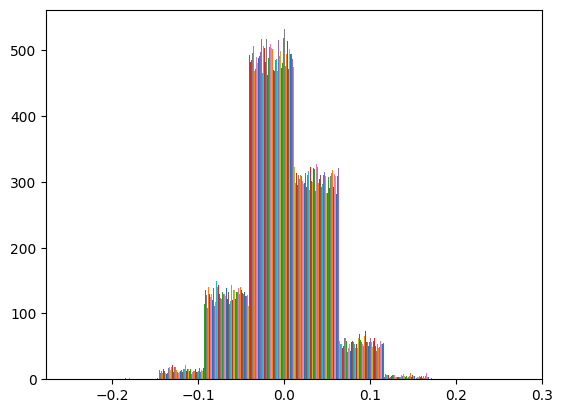

In [6]:
results = np.zeros_like(cpp_result)
for i in range(100):
    results += round_matrix(np.copy(start), 'dependent', 0, 'cpp', seed = 1009*i)

print(np.max(np.abs(results / 100.0 - start)))
plt.hist((results / 100.0 - start), rwidth=1.0)
plt.show()

### Degree Preservation

Each row and column will add up to within 1 of the original row/column (result will be the integer below/above the original).

In [11]:
row_diffs = np.sum(start, axis = 1) - np.sum(cpp_result, axis = 1)
col_diffs = np.sum(start, axis = 0) - np.sum(cpp_result, axis = 0)
print(np.max(np.abs(row_diffs)))
print(np.max(np.abs(col_diffs)))

0.9503736412327157
0.9724584066937609


### Negative Correlation

Negative dependence/correlation in essence means that the probability of a set of events (those events being subset of edges incident to a vertex all being 0 or 1) happening is at or below the product of the individual events.

In [31]:
corr_start = np.abs(np.random.uniform(0,1,(10,10)))
attempts = 1000
Combined_probabilities = [0.0,0.0]
Separate_probailities = [(1-corr_start[0][0])*(1-corr_start[0][1]), corr_start[0][0]*corr_start[0][1]]
for i in range(1000):
    result = round_matrix(np.copy(corr_start), 'dependent', 0, 'cpp', seed = 1009*i)
    if result[0][0] == 0.0 and result[0][1] == 0.0:
        Combined_probabilities[0] += 1.0/1000
    if result[0][0] == 1.0 and result[0][1] == 1.0:
        Combined_probabilities[1] += 1.0/1000

#each element of combined is most likely lower than corresponding separate (not guaranteed due to sampling)
print(Combined_probabilities)
print(Separate_probailities)

[0.04400000000000003, 0.12800000000000009]
[0.11314895340204116, 0.18350592692475637]
